In [3]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np   
import pandas as pd    
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train_data=pd.read_csv('/content/drive/MyDrive/ML Project files/train.csv')
test_data=pd.read_csv('/content/drive/MyDrive/ML Project files/test.csv')

In [5]:


train_data.shape, test_data.shape



((300000, 16), (200000, 15))

In [6]:


train_data.head()



,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
0,1,0.670390,0.811300,0.643968,0.291791,0.284117,0.855953,0.890700,0.285542,0.558245,0.779418,0.921832,0.866772,0.878733,0.305411,7.243043
1,3,0.388053,0.621104,0.686102,0.501149,0.643790,0.449805,0.510824,0.580748,0.418335,0.432632,0.439872,0.434971,0.369957,0.369484,8.203331
2,4,0.834950,0.227436,0.301584,0.293408,0.606839,0.829175,0.506143,0.558771,0.587603,0.823312,0.567007,0.677708,0.882938,0.303047,7.776091
3,5,0.820708,0.160155,0.546887,0.726104,0.282444,0.785108,0.752758,0.823267,0.574466,0.580843,0.769594,0.818143,0.914281,0.279528,6.957716
4,8,0.935278,0.421235,0.303801,0.880214,0.665610,0.830131,0.487113,0.604157,0.874658,0.863427,0.983575,0.900464,0.935918,0.435772,7.951046


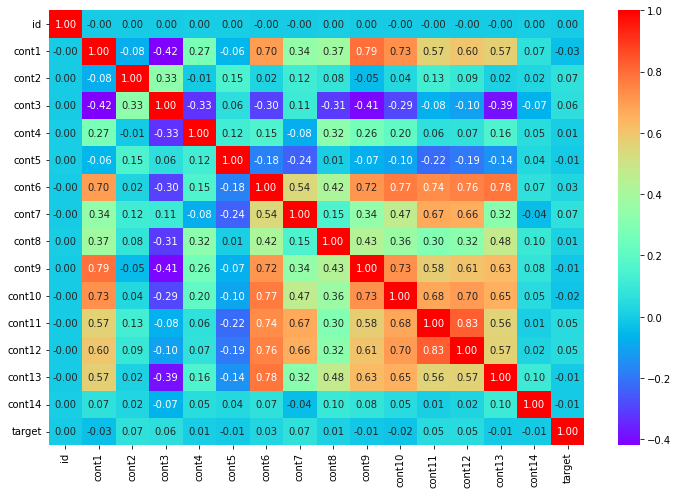

In [7]:
plt.figure(figsize=(12,8))
sns.heatmap(train_data.corr(),annot=True,fmt='.2f',cmap='rainbow', )
plt.show()

In [8]:
y=train_data['target']
X=train_data.drop(['target'],axis=1)
X_tst = test_data

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [10]:
#intialise the model to be fit and fir the model on the train data
regression_model = LinearRegression(fit_intercept=True)
regression_model.fit(X_train, y_train)
y_rgr_predict=regression_model.predict(X_test)
mse_lnr = mean_squared_error(y_test,y_rgr_predict)
rmse_lnr = np.sqrt(mse_lnr)


In [11]:
print("Mean Squared Error: %.2f" % mse_lnr,"Root Mean Squared Error: %.2f" % rmse_lnr)


Mean Squared Error: 0.52 Root Mean Squared Error: 0.72


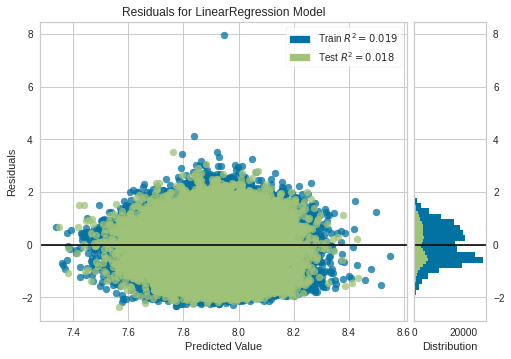

In [12]:
from yellowbrick.regressor import AlphaSelection, PredictionError, ResidualsPlot
visualizer = ResidualsPlot(regression_model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
g = visualizer.poof()             # Draw/show/poof the data


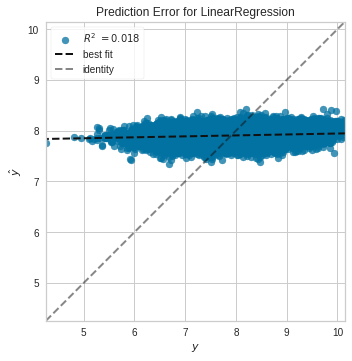

In [13]:
Pred_error  = PredictionError(regression_model)
Pred_error.fit(X_train, y_train)  # Fit the training data to the visualizer
Pred_error.score(X_test, y_test)  # Evaluate the model on the test data 
g = Pred_error.poof() 

In [14]:

X_train.shape,y_train.shape


((225000, 15), (225000,))

In [15]:
from sklearn import linear_model

ridge_model = linear_model.Ridge()
ridge_model.fit(X_train,y_train)
y_rid_predict=ridge_model.predict(X_test)
mse_rid = mean_squared_error(y_test,y_rid_predict)
rmse_rid = np.sqrt(mse_rid)


In [16]:
print("Mean Squared Error: %.2f" % mse_rid,"Root Mean Squared Error: %.2f" % rmse_rid)


Mean Squared Error: 0.52 Root Mean Squared Error: 0.72


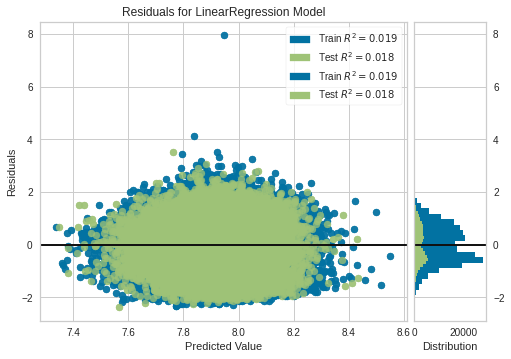

In [17]:
from yellowbrick.regressor import AlphaSelection, PredictionError, ResidualsPlot
pred = ResidualsPlot(ridge_model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
g = visualizer.poof()             # Draw/show/poof the data


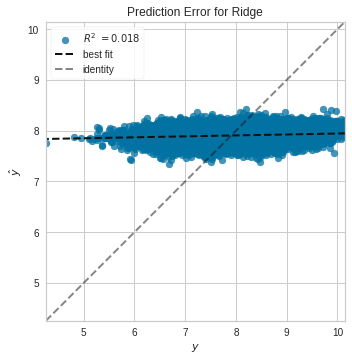

In [18]:
Pred_error  = PredictionError(ridge_model)
Pred_error.fit(X_train, y_train)  # Fit the training data to the visualizer
Pred_error.score(X_test, y_test)  # Evaluate the model on the test data 
g = Pred_error.poof()             # Draw/show/poof the data

In [20]:
from sklearn.ensemble import RandomForestRegressor

rnd_reg = RandomForestRegressor(max_depth = 2, n_estimators = 100,random_state = 42)
rnd_reg.fit(X_train, y_train)
y_rnd_pred = rnd_reg.predict(X_test)
mse_rnd = mean_squared_error(y_test,y_rnd_pred)
rmse_rnd = np.sqrt(mse_rnd)
rsqr=rnd_reg.score(X_train,y_train)

In [22]:
print("Mean Squared Error: %.2f" % mse_rnd,"Root Mean Squared Error: %.2f" % rmse_rnd, "R Squared: %2f" % rsqr)


Mean Squared Error: 0.53 Root Mean Squared Error: 0.73 R Squared: 0.014162


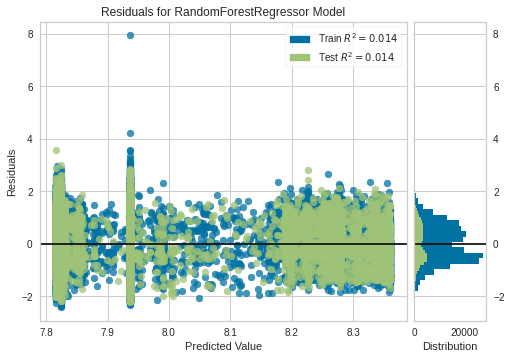

In [23]:
from yellowbrick.regressor import AlphaSelection, PredictionError, ResidualsPlot
visualizer = ResidualsPlot(rnd_reg)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
g = visualizer.poof()             # Draw/show/poof the data


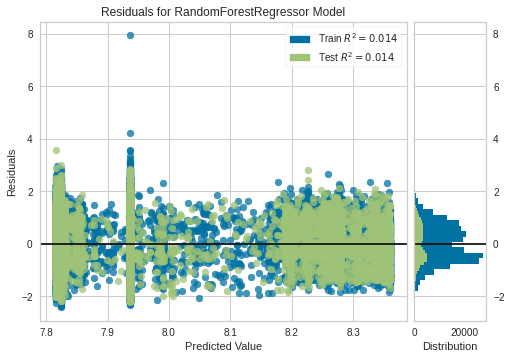

In [24]:
from yellowbrick.regressor import AlphaSelection, PredictionError, ResidualsPlot
visualizer = ResidualsPlot(rnd_reg)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
g = visualizer.poof()             # Draw/show/poof the data


In [25]:
from sklearn.tree import DecisionTreeRegressor

dtree=DecisionTreeRegressor(random_state=42)
dtree.fit(X_train,y_train)
y_decision_pred=dtree.predict(X_test)
mse_dt = mean_squared_error(y_test,y_decision_pred)
rmse_dt = np.sqrt(mse_dt)

In [27]:
print("Mean Squared Error: %.2f" % mse_dt,"Root Mean Squared Error: %.2f" % rmse_dt)


Mean Squared Error: 1.02 Root Mean Squared Error: 1.01


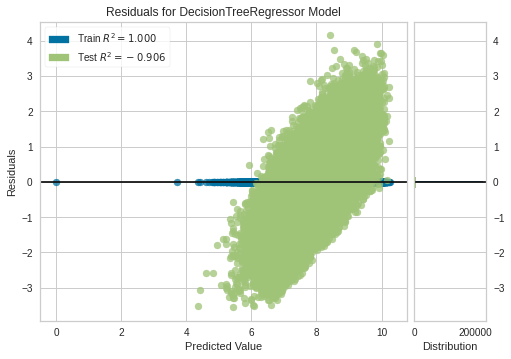

In [28]:
from yellowbrick.regressor import AlphaSelection, PredictionError, ResidualsPlot
visualizer = ResidualsPlot(dtree)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
g = visualizer.poof()             # Draw/show/poof the data


In [30]:
ans = rnd_reg.predict(X_tst)
#ans1 = rnd_reg.predict(X_tst)
#ans2 = regression_model.predict(X_tst)
submission = pd.DataFrame({"id": test_data['id'],"target": ans})
display(submission)
submission.to_csv('/content/drive/MyDrive/ML Project files/sample_submission.csv', index=False)

,id,target
0,0,7.937047
1,2,7.816503
2,6,7.816503
3,7,7.824183
4,10,7.937047
...,...,...
199995,499984,7.935970
199996,499985,7.824183
199997,499987,7.937047
199998,499988,7.935970


PermissionError: ignored